In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load the Data Set ###

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/YuvinduLakshin/Understanding-Climate-Events-and-Their-Economic-Impact/refs/heads/main/global_climate_events_economic_impact_2020_2025.csv')


#### Preprocessing & Classification ####

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       465
           1       0.83      0.83      0.83       435

    accuracy                           0.83       900
   macro avg       0.83      0.83      0.83       900
weighted avg       0.83      0.83      0.83       900



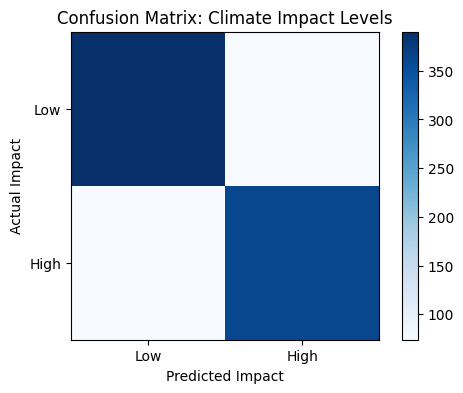

In [23]:
# Create binary classification target based on median impact
median_val = df['economic_impact_million_usd'].median()
df['impact_level'] = (df['economic_impact_million_usd'] > median_val).astype(int)

# One-hot encoding for categorical data (event_type)
df_model = pd.get_dummies(df, columns=['event_type'], drop_first=True)

# Define feature matrix (X) and target vector (y)
features = [
    'severity', 'duration_days', 'affected_population', 
    'infrastructure_damage_score'
] + [col for col in df_model.columns if 'event_type_' in col]

X = df_model[features]
y = df_model['impact_level']

# Split data: 70% Training, 30% Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Classification using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualizing Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix: Climate Impact Levels')
plt.colorbar()
plt.xlabel('Predicted Impact')
plt.ylabel('Actual Impact')
plt.xticks([0, 1], ['Low', 'High'])
plt.yticks([0, 1], ['Low', 'High'])
plt.savefig('impact_confusion_matrix.png')

#### Statical Analysing Part and Visualization Part ####

In [5]:
# Using pandas methods for statistical moments
print(f"Skewness: {df['economic_impact_million_usd'].skew():.2f}")
print(f"Kurtosis: {df['economic_impact_million_usd'].kurt():.2f}")

Skewness: 34.01
Kurtosis: 1462.49


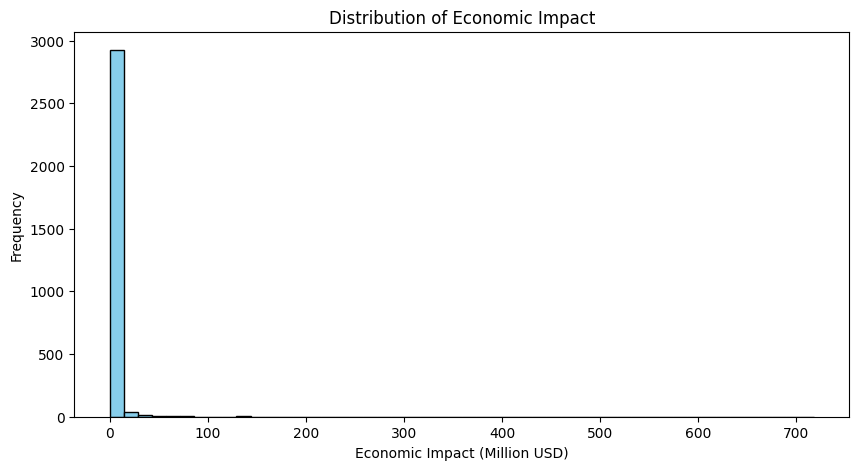

In [7]:
# Histogram
plt.figure(figsize=(10, 5))
plt.hist(df['economic_impact_million_usd'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Economic Impact')
plt.xlabel('Economic Impact (Million USD)')
plt.ylabel('Frequency')
plt.savefig('economic_impact_dist.png')

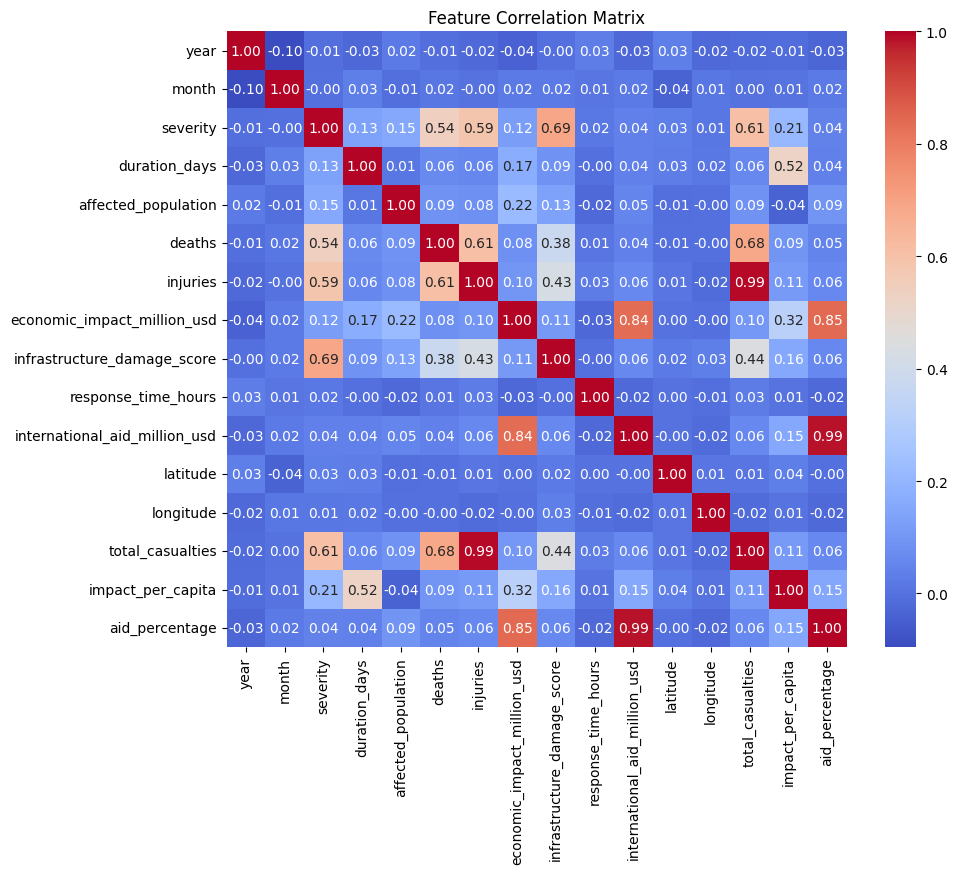

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.savefig('correlation_matrix.png')

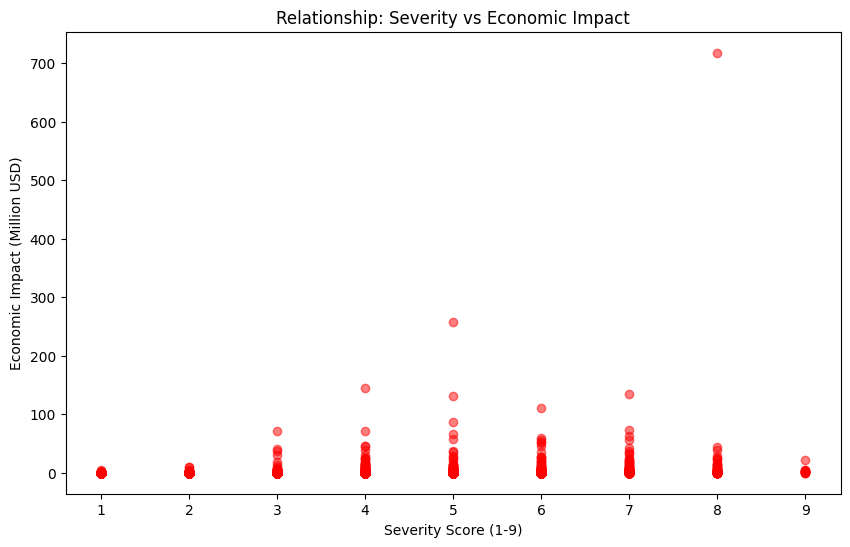

In [9]:
# Scatter Plot: Severity vs Impact
plt.figure(figsize=(10, 6))
plt.scatter(df['severity'], df['economic_impact_million_usd'], alpha=0.5, color='red')
plt.title('Relationship: Severity vs Economic Impact')
plt.xlabel('Severity Score (1-9)')
plt.ylabel('Economic Impact (Million USD)')
plt.savefig('severity_impact_scatter.png')

/var/folders/bx/k6ybmtsn35v7hwlj0v6dz9tc0000gn/T/ipykernel_2726/461844136.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['event_type'] == et]['severity'] for et in event_types], labels=event_types)


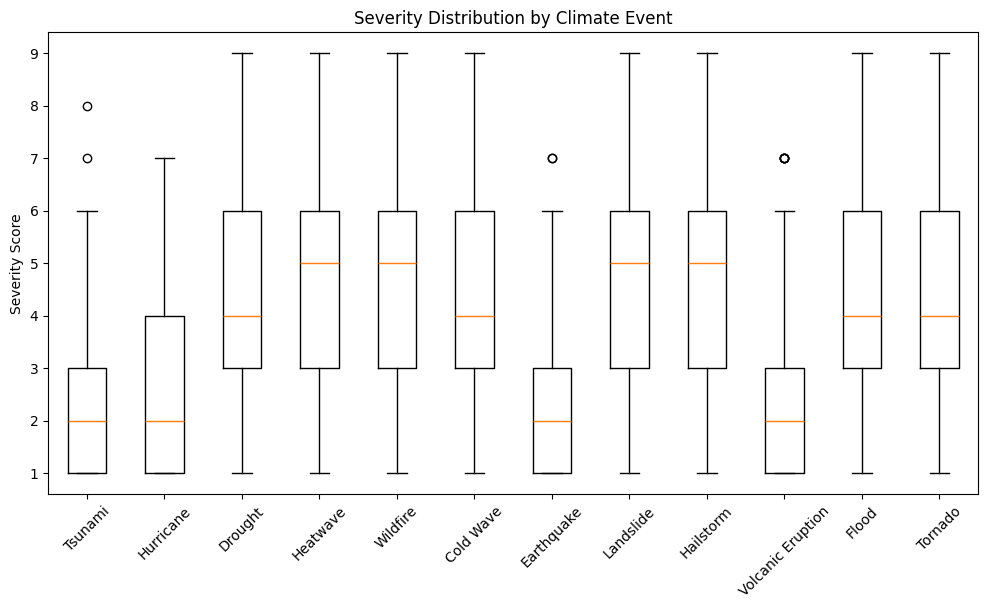

In [10]:
# Box Plot: Severity by Event Type
event_types = df['event_type'].unique()
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['event_type'] == et]['severity'] for et in event_types], labels=event_types)
plt.xticks(rotation=45)
plt.title('Severity Distribution by Climate Event')
plt.ylabel('Severity Score')
plt.savefig('severity_boxplot.png')

##### Country/Region Comparison #####

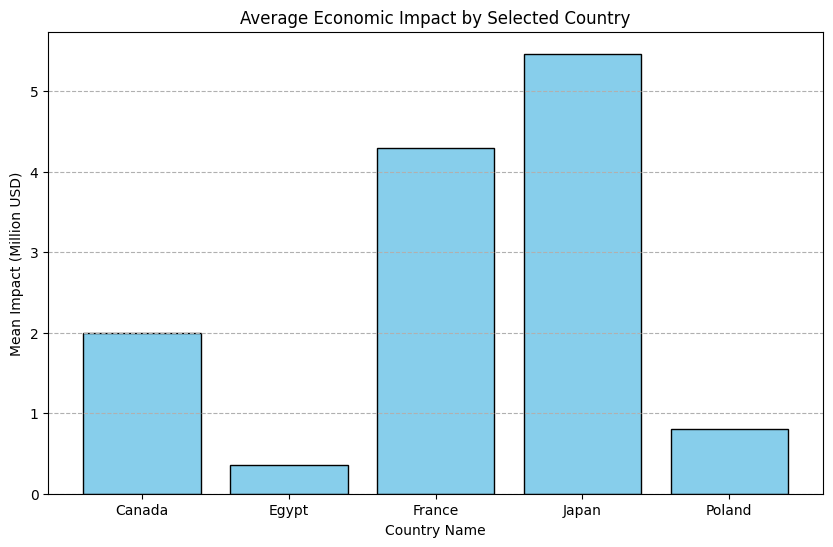

In [24]:
# Selecting specific countries for comparison
countries = ['Japan', 'France', 'Egypt', 'Canada', 'Poland']
df_sub = df[df['country'].isin(countries)]

# Grouping to find the average impact per country
country_comparison = df_sub.groupby('country')['economic_impact_million_usd'].mean()

# Plotting using basic Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(country_comparison.index, country_comparison.values, color='skyblue', edgecolor='black')

# Labeling axes (Crucial for marks)
plt.title('Average Economic Impact by Selected Country')
plt.xlabel('Country Name')
plt.ylabel('Mean Impact (Million USD)')
plt.grid(axis='y', linestyle='--')
plt.show()

##### Section: Time-Series Analysis ######

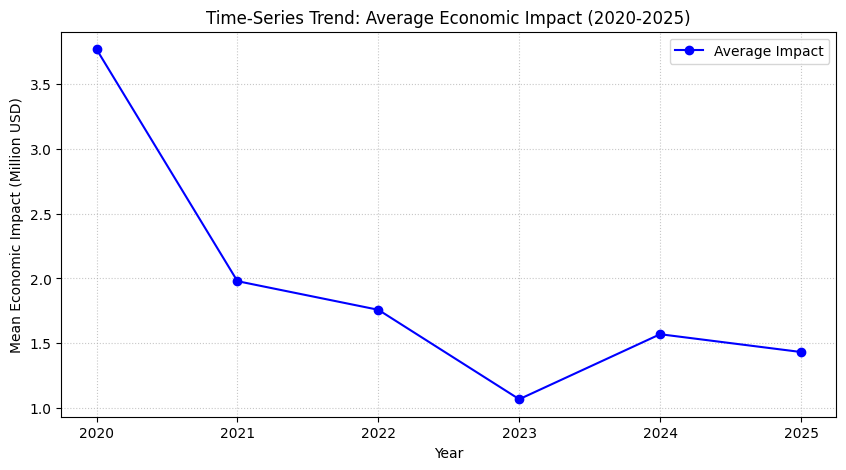

Yearly Average Economic Impact:
year
2020    3.771128
2021    1.979311
2022    1.758040
2023    1.067215
2024    1.569391
2025    1.431845
Name: economic_impact_million_usd, dtype: float64


In [ ]:

# In this section, we analyze the progression of climate event impacts over time.
# Grouping the data by 'year' to calculate the average annual economic loss.

# Calculating the mean impact per year
yearly_impact = df.groupby('year')['economic_impact_million_usd'].mean()

# Creating a Line Plot (Time-Series)
plt.figure(figsize=(10, 5))
plt.plot(yearly_impact.index, yearly_impact.values, color='blue', linestyle='-', marker='o', label='Average Impact')

# Adding PEP-8 compliant labels and titles
plt.title('Time-Series Trend: Average Economic Impact (2020-2025)')
plt.xlabel('Year')
plt.ylabel('Mean Economic Impact (Million USD)')

# Adding a legend and grid 
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

# Saving the plot for the report/presentation
plt.savefig('time_series_impact.png')
plt.show()

# Displaying the yearly figures for the Data Story commentary
print("Yearly Average Economic Impact:")
print(yearly_impact)

##### Summary of Statistics #####

In [26]:

# Defining the key numerical variables for statistical analysis
key_variables = [
    'economic_impact_million_usd', 
    'severity', 
    'duration_days', 
    'affected_population'
]

# Using .describe() to get Mean, Std Dev, Min, Max, and Quartiles (Median)

summary_stats = df[key_variables].describe()

# Adding Skewness and Kurtosis to complete the statistical profile

skewness = df[key_variables].skew()
kurtosis = df[key_variables].kurtosis()

# Appending these to our summary table
summary_stats.loc['skewness'] = skewness
summary_stats.loc['kurtosis'] = kurtosis

# Displaying the final summary table
print("Comprehensive Summary Statistics:")
print(summary_stats.round(2))

Comprehensive Summary Statistics:
          economic_impact_million_usd  severity  duration_days  \
count                         3000.00   3000.00        3000.00   
mean                             1.94      3.79           8.78   
std                             15.73      2.01          14.71   
min                              0.00      1.00           0.00   
25%                              0.01      2.00           1.00   
50%                              0.09      4.00           2.00   
75%                              0.53      5.00           9.00   
max                            718.21      9.00         115.00   
skewness                        34.01      0.29           2.94   
kurtosis                      1462.49     -0.83          10.31   

          affected_population  
count                 3000.00  
mean                868550.50  
std                3009689.61  
min                    622.00  
25%                  54517.75  
50%                 178477.00  
75%            